# In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.
Hint:-
import numpy as np,
import matplotlib.pyplot as plt,
from mpl_toolkits.mplot3d import Axes3D,
from sklearn import decomposition,
from sklearn import datasets

In [1]:
%config Completer.use_jedi = False #this is command used for enable autocompletion in jupyt notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [3]:
data=datasets.load_iris(as_frame=True)

In [4]:
data

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [5]:
df=data["frame"]

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
x=df.iloc[:,0:3].values
y=df.loc[:,['target']].values

In [9]:
import pandas as pd

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
princitpalcomponent=pca.fit_transform(x)
princdf=pd.DataFrame(data=princitpalcomponent,columns=["p1",'p2','p3'])

In [12]:
princdf

,p1,p2,p3
0,-2.490880,0.320973,-0.033975
1,-2.523343,-0.178401,-0.232901
2,-2.711149,-0.137820,-0.002506
3,-2.557756,-0.315675,0.067051
4,-2.538964,0.331357,0.098615
...,...,...,...
145,1.660591,0.219289,-0.104298
146,1.366886,-0.368303,-0.240215
147,1.582625,0.091444,0.028280
148,1.612547,0.157274,0.561919


In [13]:
finaldf=pd.concat([princdf, df[['target']]],axis=1)

In [14]:
finaldf

,p1,p2,p3,target
0,-2.490880,0.320973,-0.033975,0
1,-2.523343,-0.178401,-0.232901,0
2,-2.711149,-0.137820,-0.002506,0
3,-2.557756,-0.315675,0.067051,0
4,-2.538964,0.331357,0.098615,0
...,...,...,...,...
145,1.660591,0.219289,-0.104298,2
146,1.366886,-0.368303,-0.240215,2
147,1.582625,0.091444,0.028280,2
148,1.612547,0.157274,0.561919,2


In [15]:
finaldf.replace(to_replace=0, value="setosa",inplace=True)
finaldf.replace(to_replace=1, value="versicolor",inplace=True)
finaldf.replace(to_replace=2, value="verginica",inplace=True)

In [16]:
finaldf

,p1,p2,p3,target
0,-2.490880,0.320973,-0.033975,setosa
1,-2.523343,-0.178401,-0.232901,setosa
2,-2.711149,-0.137820,-0.002506,setosa
3,-2.557756,-0.315675,0.067051,setosa
4,-2.538964,0.331357,0.098615,setosa
...,...,...,...,...
145,1.660591,0.219289,-0.104298,verginica
146,1.366886,-0.368303,-0.240215,verginica
147,1.582625,0.091444,0.028280,verginica
148,1.612547,0.157274,0.561919,verginica


In [17]:
x_val=finaldf['p1']
y_val=finaldf['p2']
z_val=finaldf['p3']

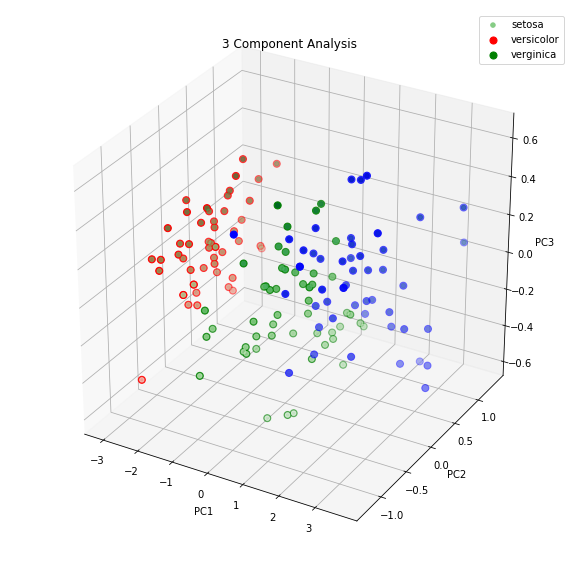

In [54]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3 Component Analysis")
ax.scatter(x_val,y_val,z_val,c=z_val,cmap="Greens")
targets= ["setosa","versicolor","verginica"]
color = ['r','g','b']

for target , color in zip(targets, colors):
    indicesToKeep = finaldf['target'] == target
    ax.scatter(finaldf.loc[indicesToKeep,'p1'],
              finaldf.loc[indicesToKeep,'p2'],
              finaldf.loc[indicesToKeep,'p3'],
                         c=color,
                         s=50)
ax.legend(targets)
ax.grid()
plt.show()
